In [17]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv('../../Data/Raw/dataset.csv')

In [18]:
#first adjustment
data = data[['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 'International', 'Curricular units 1st sem (grade)', 'Gender']]
print(data.head())


   Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 2nd sem (credited)  International  \
0                                    0              0   
1                                    0              0   
2                                    0              0   
3                                    0              0   
4                                    0              0   

   Curricular units 1st sem (grade)  Gender  
0                          0.000000       1  
1                         14.000000       1  
2                          0.000000       1  
3                         13.428571       0  
4                         12.333333       0  


In [19]:
#second adjustment
data['Curricular units 1st year (credited)'] = data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)']
print(data.head())

   Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 2nd sem (credited)  International  \
0                                    0              0   
1                                    0              0   
2                                    0              0   
3                                    0              0   
4                                    0              0   

   Curricular units 1st sem (grade)  Gender  \
0                          0.000000       1   
1                         14.000000       1   
2                          0.000000       1   
3                         13.428571       0   
4                         12.333333       0   

   Curr

In [20]:
#third adjustment
data['Curricular units 1st sem (grade)'] = data['Curricular units 1st sem (grade)'] * 5
print(data.head())

   Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 2nd sem (credited)  International  \
0                                    0              0   
1                                    0              0   
2                                    0              0   
3                                    0              0   
4                                    0              0   

   Curricular units 1st sem (grade)  Gender  \
0                          0.000000       1   
1                         70.000000       1   
2                          0.000000       1   
3                         67.142857       0   
4                         61.666667       0   

   Curr


Statistical Summary for Numeric Columns:
       Curricular units 1st sem (grade)  Age at enrollment  \
count                       4424.000000        4424.000000   
mean                          53.204108          23.265145   
std                           24.218317           7.587816   
min                            0.000000          17.000000   
25%                           55.000000          19.000000   
50%                           61.428571          20.000000   
75%                           67.000000          25.000000   
max                           94.375000          70.000000   

       Curricular units 1st year (credited)  \
count                           4424.000000   
mean                               1.251808   
std                                4.220239   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                    

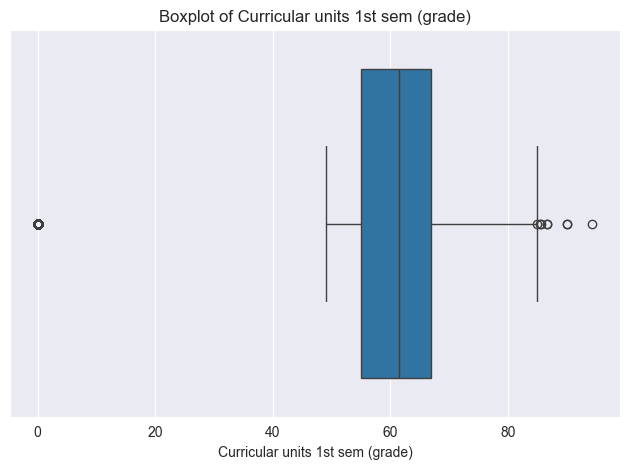

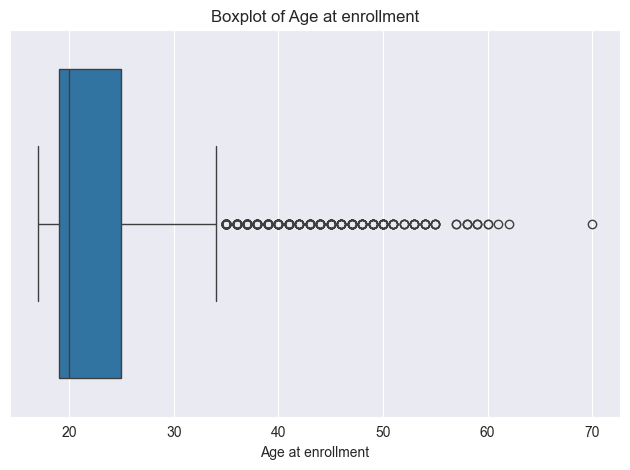

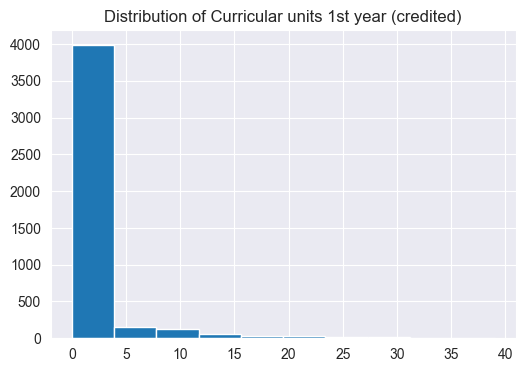

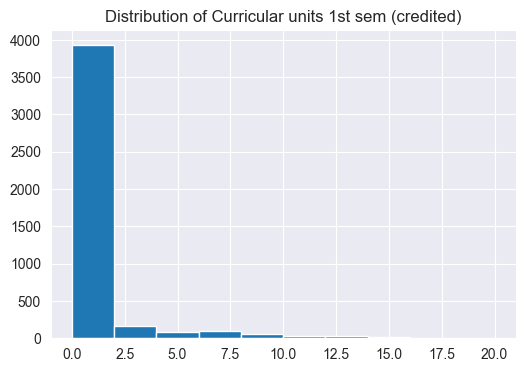

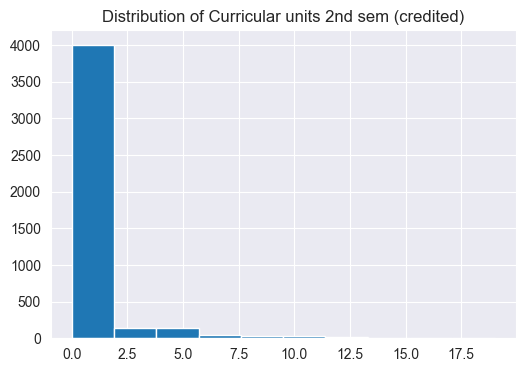

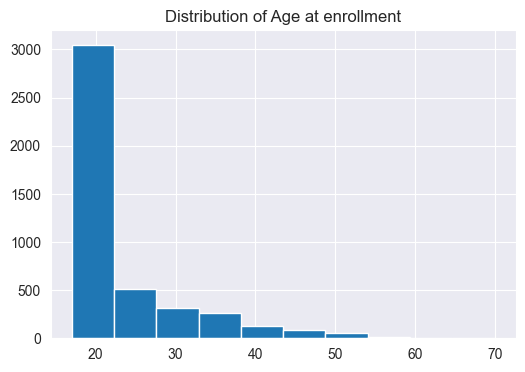

C:\Users\User\AppData\Local\Temp\ipykernel_3972\2289868407.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette=custom_palette)


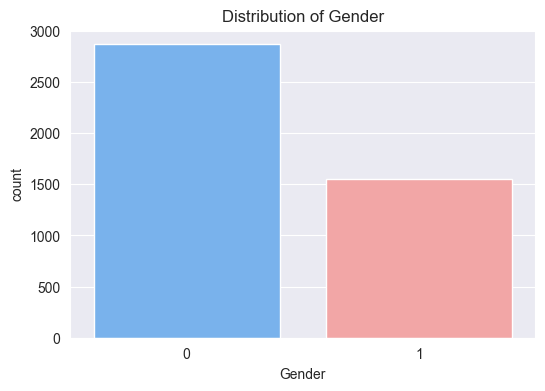

C:\Users\User\AppData\Local\Temp\ipykernel_3972\2289868407.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette=custom_palette)


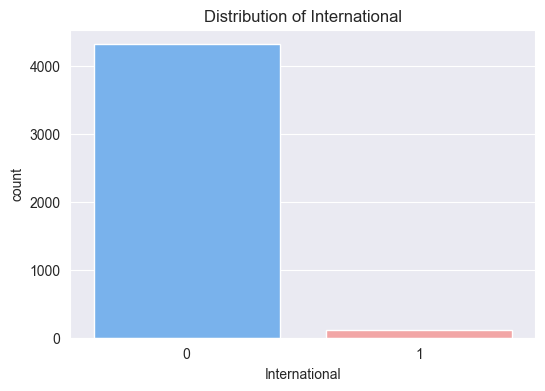

In [21]:
import seaborn as sns
numeric_cols = ["Curricular units 1st sem (grade)", "Age at enrollment", "Curricular units 1st year (credited)", "Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)", "Age at enrollment"]

# Summary statistics for numeric columns
print("\nStatistical Summary for Numeric Columns:")
print(data[numeric_cols].describe())
numeric_cols_box_plot = ["Curricular units 1st sem (grade)", "Age at enrollment"]
# Visualization for numeric columns
for col in numeric_cols_box_plot:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()
    
hist_cols_non_binary = ["Curricular units 1st year (credited)", "Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)", "Age at enrollment"]
for col in hist_cols_non_binary:
    plt.figure(figsize=(6, 4))
    plt.hist(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.show()

custom_palette = ["#66B2FF", "#FF9999"]
hist_cols_binary = ["Gender", "International"]
for col in hist_cols_binary:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette=custom_palette)
    plt.title(f"Distribution of {col}")
    plt.show()

In [25]:
def detect_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[
        (df[columns] < lower_bound) | (df[columns] > upper_bound)
    ][columns]
    return outliers



cols = ["Curricular units 1st sem (grade)", "Age at enrollment", "Curricular units 1st year (credited)",
                 "Age at enrollment","Gender", "International"]

for col in cols:
    print(len(detect_outliers_iqr(data, col)))

726
441
603
577
530
441
0
110


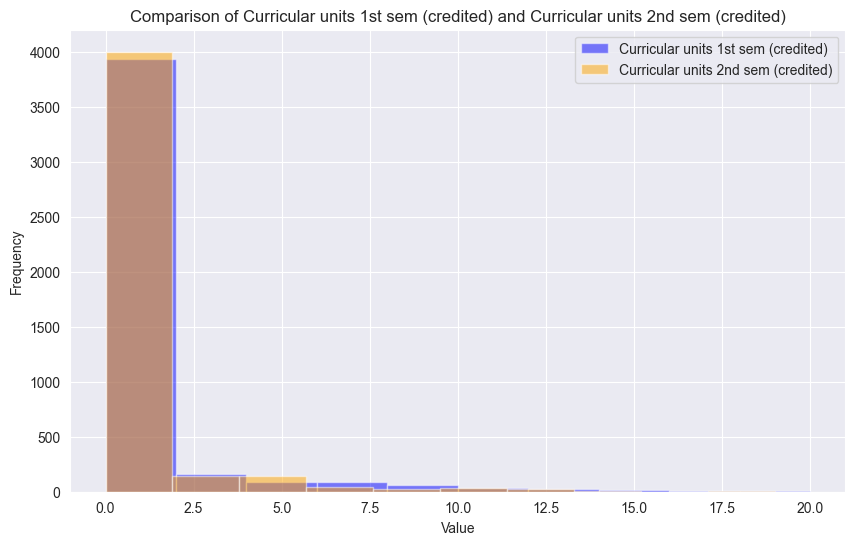

In [30]:
plt.figure(figsize=(10, 6))

# Overlay histograms
plt.hist(data["Curricular units 1st sem (credited)"], bins=10, alpha=0.5, label="Curricular units 1st sem (credited)", color='blue')
plt.hist(data["Curricular units 2nd sem (credited)"], bins=10, alpha=0.5, label="Curricular units 2nd sem (credited)", color='orange')

# Add labels, title, and legend
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Comparison of Curricular units 1st sem (credited) and Curricular units 2nd sem (credited)")
plt.legend(loc="upper right")